In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import os

# ***Exploring directory and video paths***

In [20]:
#Root and Splitting Training, Validation and Testing datasets
root = '/kaggle/input/ucf101/'

train_split = os.path.join(root,'UCF101TrainTestSplits-RecognitionTask/ucfTrainTestlist','trainlist02.txt')
val_split = os.path.join(root,'UCF101TrainTestSplits-RecognitionTask/ucfTrainTestlist','testlist02.txt')

train_paths, val_paths, test_paths = [], [], []

classes = ['BlowDryHair','Bowling', 'PlayingFlute', 'SoccerPenalty', 'TrampolineJumping']
with open(train_split, 'r') as f:
    train_videos = f.read().splitlines()
    for train_video in train_videos:
        paths, _ = train_video.split(' ')
        labels = paths.split('/')[0]
        if classes and labels not in classes:
            continue    
        train_paths.append((os.path.join(root,'UCF101/UCF-101',paths),classes.index(labels)))

with open(val_split, 'r') as f:
    test_videos = f.read().splitlines()
    for test_video in test_videos:
        paths = test_video.split(' ')[0]
        labels = paths.split('/')[0]
        if classes and labels not in classes:
            continue
        val_paths.append((os.path.join(root,'UCF101/UCF-101',paths),classes.index(labels)))
        
train_size = 0.97
train_paths, test_paths = train_test_split(train_paths, train_size=train_size)
        
print('Training videos:',len(train_paths))
print('Validation videos:',len(val_paths))
print('Testing videos:',len(test_paths))

Training videos: 482
Validation videos: 200
Testing videos: 15


**Example of the video Path data format alongside its associated labels**

In [21]:
test_paths

[('/kaggle/input/ucf101/UCF101/UCF-101/Bowling/v_Bowling_g04_c01.avi', 1),
 ('/kaggle/input/ucf101/UCF101/UCF-101/TrampolineJumping/v_TrampolineJumping_g06_c04.avi',
  4),
 ('/kaggle/input/ucf101/UCF101/UCF-101/BlowDryHair/v_BlowDryHair_g18_c01.avi',
  0),
 ('/kaggle/input/ucf101/UCF101/UCF-101/SoccerPenalty/v_SoccerPenalty_g04_c02.avi',
  3),
 ('/kaggle/input/ucf101/UCF101/UCF-101/TrampolineJumping/v_TrampolineJumping_g24_c03.avi',
  4),
 ('/kaggle/input/ucf101/UCF101/UCF-101/TrampolineJumping/v_TrampolineJumping_g21_c01.avi',
  4),
 ('/kaggle/input/ucf101/UCF101/UCF-101/BlowDryHair/v_BlowDryHair_g17_c04.avi',
  0),
 ('/kaggle/input/ucf101/UCF101/UCF-101/PlayingFlute/v_PlayingFlute_g04_c07.avi',
  2),
 ('/kaggle/input/ucf101/UCF101/UCF-101/TrampolineJumping/v_TrampolineJumping_g02_c01.avi',
  4),
 ('/kaggle/input/ucf101/UCF101/UCF-101/PlayingFlute/v_PlayingFlute_g20_c01.avi',
  2),
 ('/kaggle/input/ucf101/UCF101/UCF-101/SoccerPenalty/v_SoccerPenalty_g07_c02.avi',
  3),
 ('/kaggle/inpu

**Combining the video paths for dataframe and visualization**

In [22]:
all_paths = []

class_mapping = {
    0: 'BlowDryHair',
    1: 'Bowling',
    2: 'PlayingFlute',
    3: 'SoccerPenalty',
    4: 'TrampolineJumping',
}

for path, label in train_paths:
    cap = cv2.VideoCapture(path)
    all_paths.append({'name':path, 
                      'class':class_mapping[label], 
                      'frames':int(cap.get(cv2.CAP_PROP_FRAME_COUNT)),
                      'split':'train'})
    cap.release()
    
for path, label in val_paths:
    cap = cv2.VideoCapture(path)
    all_paths.append({'name':path, 
                      'class':class_mapping[label],
                      'frames':int(cap.get(cv2.CAP_PROP_FRAME_COUNT)),
                      'split':'val'})
    cap.release()
    
for path, label in test_paths:
    cap = cv2.VideoCapture(path)
    all_paths.append({'name':path, 
                      'class':class_mapping[label], 
                      'frames':int(cap.get(cv2.CAP_PROP_FRAME_COUNT)),
                      'split':'test'})
    cap.release()

In [23]:
df = pd.DataFrame(all_paths)

In [24]:
df.head(10)

,name,class,frames,split
0,/kaggle/input/ucf101/UCF101/UCF-101/SoccerPena...,SoccerPenalty,105,train
1,/kaggle/input/ucf101/UCF101/UCF-101/Bowling/v_...,Bowling,119,train
2,/kaggle/input/ucf101/UCF101/UCF-101/Bowling/v_...,Bowling,112,train
3,/kaggle/input/ucf101/UCF101/UCF-101/BlowDryHai...,BlowDryHair,76,train
4,/kaggle/input/ucf101/UCF101/UCF-101/SoccerPena...,SoccerPenalty,138,train
5,/kaggle/input/ucf101/UCF101/UCF-101/Trampoline...,TrampolineJumping,450,train
6,/kaggle/input/ucf101/UCF101/UCF-101/Bowling/v_...,Bowling,159,train
7,/kaggle/input/ucf101/UCF101/UCF-101/PlayingFlu...,PlayingFlute,264,train
8,/kaggle/input/ucf101/UCF101/UCF-101/Trampoline...,TrampolineJumping,240,train
9,/kaggle/input/ucf101/UCF101/UCF-101/SoccerPena...,SoccerPenalty,60,train


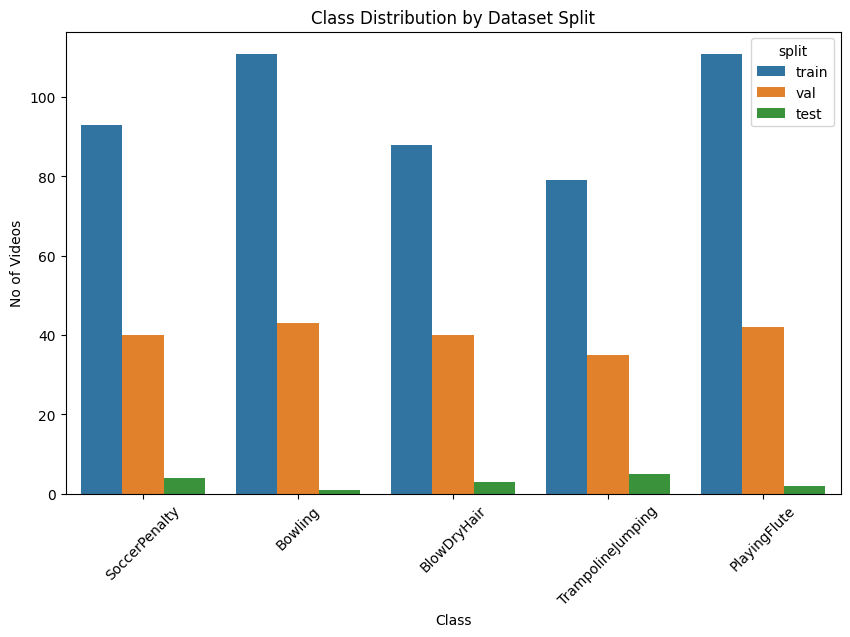

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='class', hue='split')
plt.title('Class Distribution by Dataset Split')
plt.xlabel('Class')
plt.ylabel('No of Videos')
plt.xticks(rotation=45)
plt.show()

**Data Visualization**

In [26]:
test_paths

[('/kaggle/input/ucf101/UCF101/UCF-101/Bowling/v_Bowling_g04_c01.avi', 1),
 ('/kaggle/input/ucf101/UCF101/UCF-101/TrampolineJumping/v_TrampolineJumping_g06_c04.avi',
  4),
 ('/kaggle/input/ucf101/UCF101/UCF-101/BlowDryHair/v_BlowDryHair_g18_c01.avi',
  0),
 ('/kaggle/input/ucf101/UCF101/UCF-101/SoccerPenalty/v_SoccerPenalty_g04_c02.avi',
  3),
 ('/kaggle/input/ucf101/UCF101/UCF-101/TrampolineJumping/v_TrampolineJumping_g24_c03.avi',
  4),
 ('/kaggle/input/ucf101/UCF101/UCF-101/TrampolineJumping/v_TrampolineJumping_g21_c01.avi',
  4),
 ('/kaggle/input/ucf101/UCF101/UCF-101/BlowDryHair/v_BlowDryHair_g17_c04.avi',
  0),
 ('/kaggle/input/ucf101/UCF101/UCF-101/PlayingFlute/v_PlayingFlute_g04_c07.avi',
  2),
 ('/kaggle/input/ucf101/UCF101/UCF-101/TrampolineJumping/v_TrampolineJumping_g02_c01.avi',
  4),
 ('/kaggle/input/ucf101/UCF101/UCF-101/PlayingFlute/v_PlayingFlute_g20_c01.avi',
  2),
 ('/kaggle/input/ucf101/UCF101/UCF-101/SoccerPenalty/v_SoccerPenalty_g07_c02.avi',
  3),
 ('/kaggle/inpu

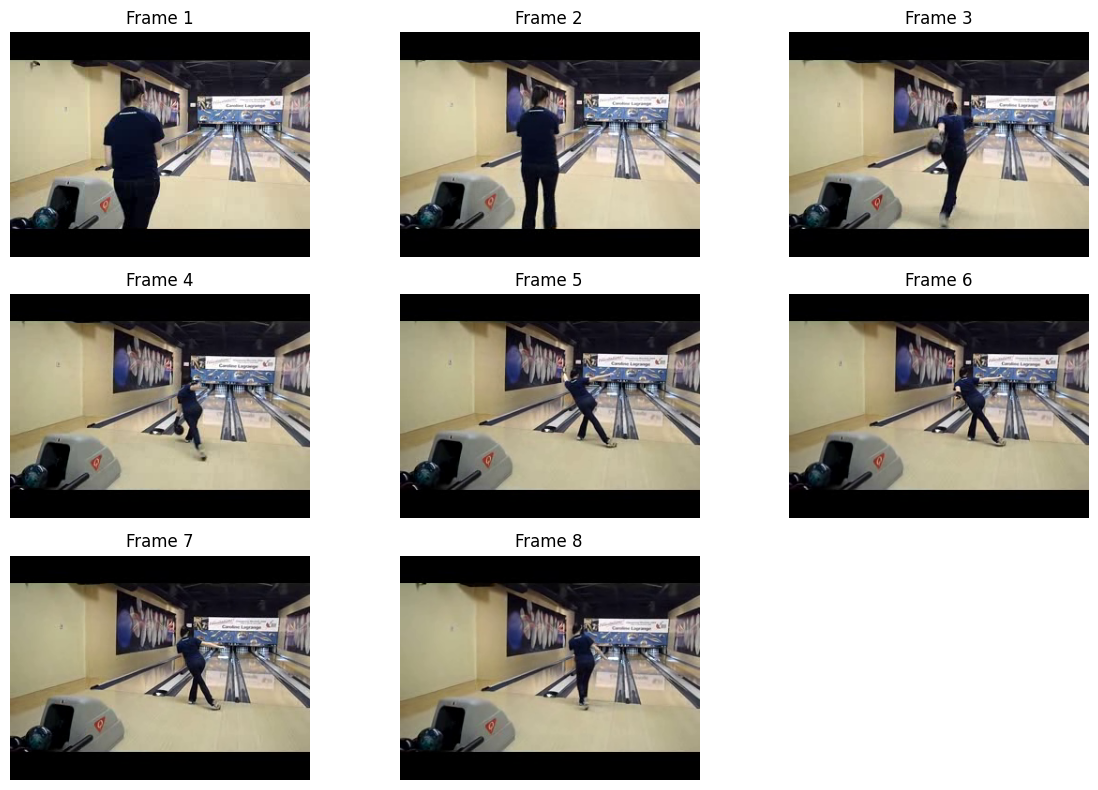

In [27]:
path = test_paths[0][0]
vid = cv2.VideoCapture(path)
frames = []

ret, frame = vid.read()
frame_count = 0

while ret:
    if frame_count % 16 == 0:
        frames.append(frame)
    ret, frame = vid.read()
    frame_count += 1
vid.release()

plt.figure(figsize=(12, 8))

for i, frame in enumerate(frames):
    plt.subplot(3, 3, i + 1)
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.title(f'Frame {i + 1}')
    plt.axis('off')
plt.tight_layout()
plt.show()